In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from natsort import natsorted, ns
from paretoset import paretoset


In [2]:
#set experiment folder as root dir of this script
experiment_folder = "./data/nsga2_exp_abs_rot_4"
os.chdir(experiment_folder)

In [3]:
pwd

'/home/julian/Data/git/revolve-energize/experiments/EC_students/data/nsga2_exp_abs_rot_4'

In [4]:
#set hyperparameters 
num_generations = 333
population_size = 111
num_runs = 30


    

In [5]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)
            

In [6]:
#contains the information about the phenotype ID of each generation
len(generation_identifiers)

30

In [7]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    print(run)
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [8]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None, delimiter=',')
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Rotation", 2:"Follow_Line"}, axis=1, inplace=True)
    fitness_values[f"{run}"]["Rotation"] = fitness_values[f"{run}"]["Rotation"].replace('None', '0').astype(str)
    fitness_values[f"{run}"]["Follow_Line"] = fitness_values[f"{run}"]["Follow_Line"].replace('None', '0').astype(str)
    fitness_values[f"{run}"]["Rotation"] = fitness_values[f"{run}"]["Rotation"].apply(lambda x: x.replace('(','').replace(')','')).astype(float)
    fitness_values[f"{run}"]["Follow_Line"] = fitness_values[f"{run}"]["Follow_Line"].apply(lambda x: x.replace('(','').replace(')','')).astype(float)
    

In [9]:
fitness_values['12']

,Individual_ID,Rotation,Follow_Line
0,1,2.923090e-02,0.002456
1,2,1.629465e-08,0.000000
2,3,6.090111e+00,0.000000
3,4,9.999995e-03,0.000000
4,5,1.138714e-07,0.000000
...,...,...,...
22018,22019,1.570023e+01,0.002990
22019,22020,1.460379e-02,0.000000
22020,22021,7.797110e-07,0.000000
22021,22022,1.177684e+00,0.000000


In [10]:
fitness_values[str(13)].T[(12510)]['Follow_Line']

0.0

In [11]:
# no exchange the phenotype ID with the fitness value 
fitness_df_1 = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df.T)):
            individual = int((_fitness_df[gen][int(index)]))
            try:
                fitness_value = fitness_values[str(_run)].T[(individual)]['Follow_Line']
                _fitness_df[gen][index] = fitness_value
            except:
                _fitness_df[gen][index] = 0
           
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df_1 = fitness_df_1.append(_fitness_df)

In [12]:
run_df

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
generation_0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
generation_1,36.0,81.0,123.0,171.0,112.0,74.0,44.0,157.0,144.0,85.0,...,61.0,173.0,143.0,114.0,118.0,94.0,45.0,38.0,115.0,80.0
generation_2,36.0,81.0,123.0,171.0,181.0,74.0,231.0,44.0,235.0,144.0,...,148.0,26.0,27.0,228.0,236.0,177.0,183.0,179.0,209.0,174.0
generation_3,36.0,81.0,123.0,171.0,181.0,74.0,231.0,44.0,235.0,157.0,...,238.0,161.0,147.0,92.0,281.0,149.0,49.0,190.0,63.0,268.0
generation_4,36.0,81.0,123.0,171.0,181.0,356.0,231.0,44.0,235.0,157.0,...,76.0,5.0,327.0,370.0,288.0,343.0,261.0,265.0,25.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
generation_328,10474.0,19394.0,11227.0,11709.0,19491.0,19437.0,17906.0,8954.0,19754.0,18838.0,...,15457.0,8611.0,19633.0,21371.0,21586.0,16856.0,21028.0,21558.0,21512.0,18871.0
generation_329,10474.0,19394.0,11227.0,11709.0,19491.0,17906.0,21816.0,8954.0,19754.0,18838.0,...,18445.0,21575.0,21672.0,15457.0,8611.0,19633.0,21371.0,21586.0,16856.0,21028.0
generation_330,10474.0,19394.0,11227.0,11709.0,17906.0,21844.0,21816.0,8954.0,19754.0,18838.0,...,18445.0,19181.0,21672.0,21575.0,15457.0,21586.0,8611.0,19633.0,21371.0,16856.0
generation_331,10474.0,19394.0,11227.0,11709.0,17906.0,21844.0,21816.0,8954.0,19754.0,18838.0,...,18445.0,19181.0,21672.0,19633.0,21575.0,15457.0,21586.0,8611.0,16856.0,21371.0


In [13]:
# no exchange the phenotype ID with the fitness value 
fitness_df_2 = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df.T)):
            individual = int((_fitness_df[gen][int(index)]))
            try:
                fitness_value = fitness_values[str(_run)].T[(individual)]['Rotation']
                _fitness_df[gen][index] = fitness_value
            except:
                _fitness_df[gen][index] = 0
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df_2 = fitness_df_2.append(_fitness_df)

In [14]:
fitness_df_2

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,generation_9,...,generation_324,generation_325,generation_326,generation_327,generation_328,generation_329,generation_330,generation_331,generation_332,run
0,2.965930e-35,2.546954e+00,2.546954e+00,2.546954e+00,1.423711e-01,1.423711e-01,1.423711e-01,1.423711e-01,0.142371,0.142371,...,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,1.0
1,4.477836e+00,3.207963e-03,5.500512e-02,1.423711e-01,6.433207e-01,1.670400e-01,1.670400e-01,1.670400e-01,0.253866,0.253866,...,2.395407e+00,2.395407e+00,2.395407e+00,2.395407e+00,2.395407e+00,2.395407e+00,2.395407e+00,2.395407e+00,2.395407e+00,1.0
2,6.294240e-02,8.863961e-07,3.207963e-03,5.500512e-02,5.500512e-02,6.079101e-01,6.079101e-01,6.079101e-01,0.607910,0.607910,...,1.840835e+00,1.840835e+00,1.840835e+00,1.840835e+00,1.840835e+00,1.840835e+00,1.840835e+00,1.840835e+00,1.840835e+00,1.0
3,2.448409e-01,2.677460e-02,8.863961e-07,3.207963e-03,3.207963e-03,6.713683e-09,1.684087e+00,3.207963e-03,1.684087,1.684087,...,4.428583e+01,4.428583e+01,4.428583e+01,4.428583e+01,4.428583e+01,4.428583e+01,4.428583e+01,4.428583e+01,4.428583e+01,1.0
4,2.978551e-01,1.202828e+01,2.677460e-02,6.713683e-09,6.713683e-09,3.207963e-03,3.207963e-03,1.684087e+00,0.003208,0.003208,...,3.976556e-35,3.976556e-35,3.976556e-35,3.976556e-35,3.976556e-35,3.976556e-35,3.976556e-35,3.976556e-35,3.976556e-35,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.179480e-01,1.399946e-03,2.244626e-01,1.031420e-01,4.795766e+00,1.661853e-01,1.164405e-01,5.234944e-35,0.036218,0.974397,...,5.031243e+01,4.076662e-35,5.031243e+01,3.706243e-35,3.706243e-35,6.068391e+00,8.197449e+01,5.641677e+01,3.706243e-35,30.0
107,8.306695e-07,8.819841e-02,7.896570e-02,1.973196e+00,1.253904e+00,5.880736e-02,6.804366e+00,3.975546e+00,0.710212,0.108506,...,3.706243e-35,2.668544e+00,3.706243e-35,5.031243e+01,5.031243e+01,1.250662e+02,1.005900e+00,8.197449e+01,3.130291e+00,30.0
108,5.969555e-02,2.151671e-01,1.108392e+00,1.172941e+01,1.494601e+00,4.570637e-02,1.276260e-07,9.583081e+00,0.548221,7.752240,...,2.265944e+01,2.780227e+00,4.076662e-35,4.076662e-35,4.076662e-35,8.197449e+01,6.068391e+00,1.005900e+00,4.848614e-03,30.0
109,4.318874e-35,1.922866e-05,5.355365e-06,9.429278e-01,6.165042e-01,7.433941e+00,1.048495e+00,1.211569e+00,1.632556,1.329573,...,7.906971e+01,7.906971e+01,2.668544e+00,2.668544e+00,2.668544e+00,3.706243e-35,1.250662e+02,3.706243e-35,1.250662e+02,30.0


In [15]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}
result_df_1 = pd.DataFrame()
for run in range(num_runs):
    _result_df = pd.DataFrame()
    for gen in fitness_df_1:
        if gen != 'run':
            mean_dic[gen] = fitness_df_1[gen].mean()
            std_dic[gen] = fitness_df_1[gen].std()
            min_dic[gen] = fitness_df_1[gen].min()
            max_dic[gen] = fitness_df_1[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    _result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    _result_df['run'] = run+1
    result_df_1 = result_df_1.append(_result_df)

In [16]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}
result_df_2 = pd.DataFrame()
for run in range(num_runs):
    _result_df = pd.DataFrame()
    for gen in fitness_df_2:
        if gen != 'run':
            mean_dic[gen] = fitness_df_2[gen].mean()
            std_dic[gen] = fitness_df_2[gen].std()
            min_dic[gen] = fitness_df_2[gen].min()
            max_dic[gen] = fitness_df_2[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    _result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    _result_df['run'] = run+1
    result_df_2 = result_df_2.append(_result_df)

In [17]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}
result_df_all = pd.DataFrame()
for run in range(num_runs):
    _result_df = pd.DataFrame()
    for gen in fitness_df_2:
        if gen != 'run':
            mean_dic[gen] = fitness_df_2[gen].mean()
            std_dic[gen] = fitness_df_2[gen].std()
            min_dic[gen] = fitness_df_2[gen].min()
            max_dic[gen] = fitness_df_2[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    _result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    _result_df['run'] = run+1
    result_df_2 = result_df_2.append(_result_df)

In [18]:
result_df_2

,mean,std,min,max,run
generation_0,0.888934,2.894505,2.351676e-35,51.653268,1
generation_1,1.003489,3.112500,2.351676e-35,74.953087,1
generation_2,1.122970,2.658606,2.351676e-35,48.256224,1
generation_3,1.341895,2.874769,2.351676e-35,48.256224,1
generation_4,1.603555,3.612704,2.351676e-35,74.405599,1
...,...,...,...,...,...
generation_328,31.740102,59.979695,0.000000e+00,311.470613,30
generation_329,31.998373,60.439110,0.000000e+00,311.470613,30
generation_330,31.995554,60.534785,0.000000e+00,311.470613,30
generation_331,32.121556,60.692093,0.000000e+00,311.470613,30


In [19]:
result_df_2

,mean,std,min,max,run
generation_0,0.888934,2.894505,2.351676e-35,51.653268,1
generation_1,1.003489,3.112500,2.351676e-35,74.953087,1
generation_2,1.122970,2.658606,2.351676e-35,48.256224,1
generation_3,1.341895,2.874769,2.351676e-35,48.256224,1
generation_4,1.603555,3.612704,2.351676e-35,74.405599,1
...,...,...,...,...,...
generation_328,31.740102,59.979695,0.000000e+00,311.470613,30
generation_329,31.998373,60.439110,0.000000e+00,311.470613,30
generation_330,31.995554,60.534785,0.000000e+00,311.470613,30
generation_331,32.121556,60.692093,0.000000e+00,311.470613,30


In [20]:
result_df_1 = result_df_1.set_axis([i for i in range(len(result_df_1))])
result_df_1.index.name = 'generations'
result_df_1

,mean,std,min,max,run
generations,,,,,
0,0.004815,0.048356,-0.000073,2.035799,1
1,0.005689,0.050863,-0.000073,2.035799,1
2,0.005777,0.037123,0.000000,1.185710,1
3,0.008210,0.061715,0.000000,1.731473,1
4,0.008155,0.060401,0.000000,1.731473,1
...,...,...,...,...,...
9985,0.168007,0.547975,-0.000192,7.943399,30
9986,0.171647,0.554908,-0.000192,7.943399,30
9987,0.171216,0.555824,-0.000192,7.943399,30


In [21]:
result_df_2 = result_df_2.set_axis([i for i in range(len(result_df_2))])
result_df_2.index.name = 'generations'
result_df_2

,mean,std,min,max,run
generations,,,,,
0,0.888934,2.894505,2.351676e-35,51.653268,1
1,1.003489,3.112500,2.351676e-35,74.953087,1
2,1.122970,2.658606,2.351676e-35,48.256224,1
3,1.341895,2.874769,2.351676e-35,48.256224,1
4,1.603555,3.612704,2.351676e-35,74.405599,1
...,...,...,...,...,...
19975,31.740102,59.979695,0.000000e+00,311.470613,30
19976,31.998373,60.439110,0.000000e+00,311.470613,30
19977,31.995554,60.534785,0.000000e+00,311.470613,30


In [22]:
result_df_1

,mean,std,min,max,run
generations,,,,,
0,0.004815,0.048356,-0.000073,2.035799,1
1,0.005689,0.050863,-0.000073,2.035799,1
2,0.005777,0.037123,0.000000,1.185710,1
3,0.008210,0.061715,0.000000,1.731473,1
4,0.008155,0.060401,0.000000,1.731473,1
...,...,...,...,...,...
9985,0.168007,0.547975,-0.000192,7.943399,30
9986,0.171647,0.554908,-0.000192,7.943399,30
9987,0.171216,0.555824,-0.000192,7.943399,30


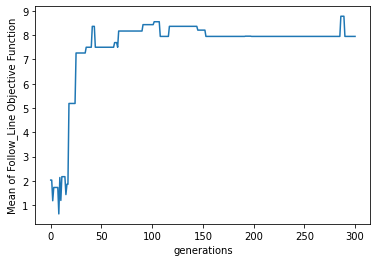

In [23]:
ax = sns.lineplot(x=result_df_1.T.columns[:301], y=result_df_1['max'][:301], markers=True, dashes=True)
ax.set(ylabel='Mean of Follow_Line Objective Function')
sns.set(rc={'figure.figsize':(15,9)})
#ax.figure.savefig("output.png")
plt.show()

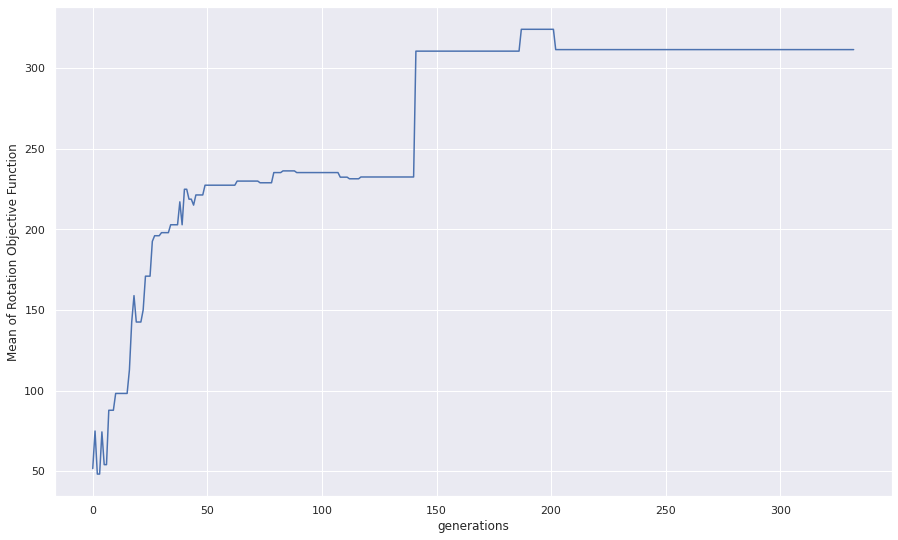

In [24]:
ax = sns.lineplot(x=result_df_2.T.columns[:333], y=result_df_2['max'][:333], markers=True, dashes=True)
ax.set(ylabel='Mean of Rotation Objective Function')
sns.set(rc={'figure.figsize':(15,9)})
#ax.figure.savefig("output.png")
plt.show()

In [25]:
result_df_1_melt = result_df_1.melt(['run'])
result_df_1_melt

,run,variable,value
0,1,mean,0.004815
1,1,mean,0.005689
2,1,mean,0.005777
3,1,mean,0.008210
4,1,mean,0.008155
...,...,...,...
39955,30,max,7.943399
39956,30,max,7.943399
39957,30,max,7.943399
39958,30,max,7.943399


In [26]:
ax = sns.lineplot(x=result_df_2.T.columns[:329], y=result_df_1_melt, hue=['mean', 'max'], markers=True, dashes=True)
ax.set(ylabel='Mean of Follow_Line Objective Function')
sns.set(rc={'figure.figsize':(15,9)})
#ax.figure.savefig("output.png")
plt.show()

ValueError: arrays must all be same length

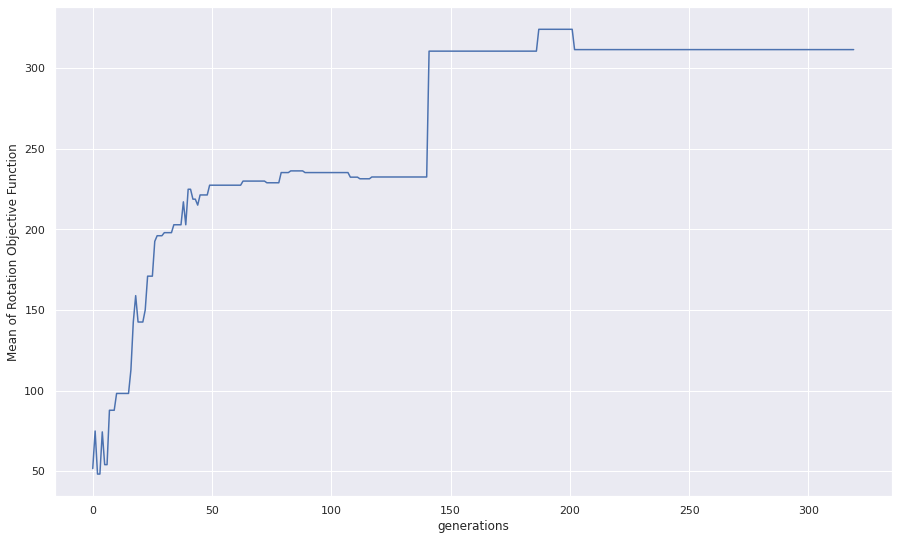

In [27]:
ax = sns.lineplot(x=result_df_2.T.columns[:320], y=result_df_2['max'][:320], markers=True, dashes=True)
ax.set(ylabel='Mean of Rotation Objective Function')
sns.set(rc={'figure.figsize':(15,9)})
#ax.figure.savefig("output.png")
plt.show()

In [28]:
formated_fitness_df_1 = cp.deepcopy(fitness_df_1)
formated_fitness_df_1.set_axis([i for i in range(len(fitness_df_1.T))], axis=1, inplace=True)
formated_fitness_df_1.rename(columns={len(fitness_df_1.T)-1 : 'run'}, inplace=True)
formated_fitness_df_1

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,run
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006007,0.006007,0.006007,0.006007,0.006007,0.006007,0.006007,0.006007,0.006007,1.0
1,0.007043,0.000000,0.001948,0.000000,0.010938,0.001394,0.001394,0.001394,0.000132,0.000132,...,0.012201,0.012201,0.012201,0.012201,0.012201,0.012201,0.012201,0.012201,0.012201,1.0
2,0.000055,0.000000,0.000000,0.001948,0.001948,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002091,0.000000,0.002091,0.002091,...,0.702418,0.702418,0.702418,0.702418,0.702418,0.702418,0.702418,0.702418,0.702418,1.0
4,0.000000,0.019722,0.000000,0.000000,0.000000,0.000000,0.000000,0.002091,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.000000,0.000000,0.000000,0.000233,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.093469,0.745676,0.173383,0.000000,30.0
107,0.000000,0.000000,0.000000,0.000000,0.000846,0.002900,0.000000,0.009486,0.111992,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.429572,0.008148,0.745676,0.044099,30.0
108,0.000000,0.003266,0.002904,0.003177,0.043277,0.001317,0.000000,0.000000,0.005912,0.028672,...,0.000947,0.019600,0.000000,0.000000,0.000000,0.745676,1.093469,0.008148,0.000000,30.0
109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000162,0.000000,0.000000,0.000542,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429572,0.000000,0.429572,30.0


In [29]:
melted_formated_fitness_1 = formated_fitness_df_1.melt(id_vars='run')
melted_formated_fitness_1.rename(columns={'variable':'generation', 'value':'fitness_follow_line'}, inplace=True)
melted_formated_fitness_1.head(3)

,run,generation,fitness_follow_line
0,1.0,0,0.000000
1,1.0,0,0.007043
2,1.0,0,0.000055


<AxesSubplot:xlabel='generation', ylabel='fitness_follow_line'>

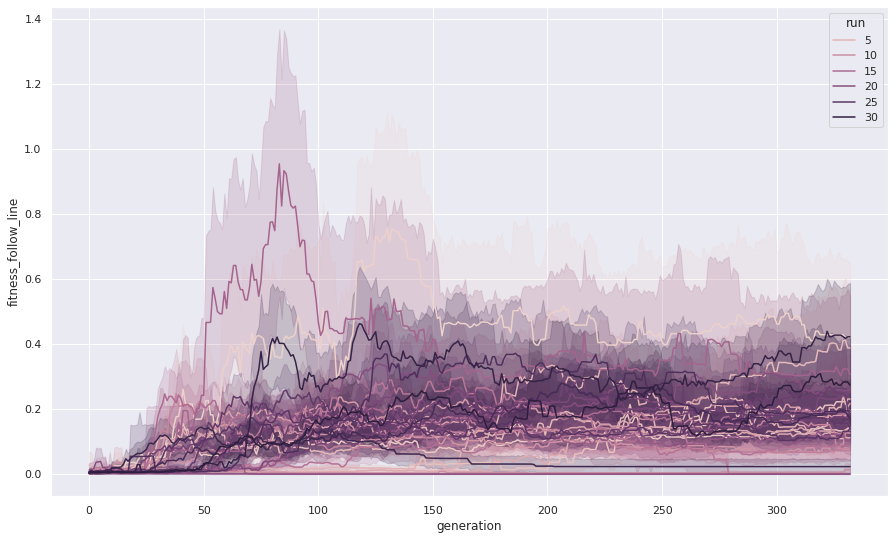

In [30]:
sns.lineplot(data=melted_formated_fitness_1, x='generation', hue='run', y='fitness_follow_line')

In [31]:
formated_fitness_df_2 = cp.deepcopy(fitness_df_2)
formated_fitness_df_2.set_axis([i for i in range(len(fitness_df_2.T))], axis=1, inplace=True)
formated_fitness_df_2.rename(columns={len(fitness_df_2.T)-1 : 'run'}, inplace=True)
melted_formated_fitness_2 = formated_fitness_df_2.melt(id_vars='run')
melted_formated_fitness_2.rename(columns={'variable':'generation', 'value':'fitness_rotation'}, inplace=True)
melted_formated_fitness_2.tail(3)

,run,generation,fitness_rotation
1108887,30.0,332,0.004849
1108888,30.0,332,125.066170
1108889,30.0,332,0.316856


<AxesSubplot:xlabel='generation', ylabel='fitness_rotation'>

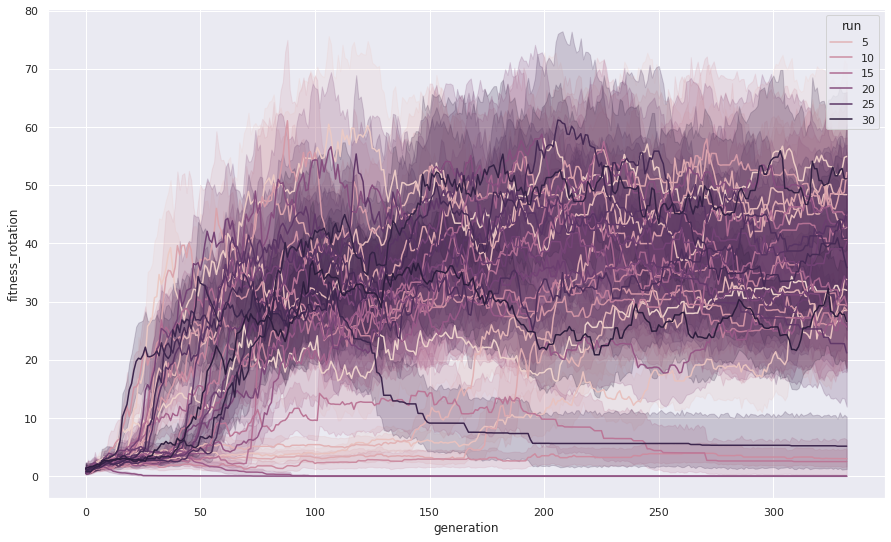

In [32]:
sns.lineplot(data=melted_formated_fitness_2, x='generation', hue='run', y='fitness_rotation')

In [33]:
frames = [fitness_df_1.loc[fitness_df_1['run']==2], fitness_df_2.loc[fitness_df_2['run']==2]]


In [34]:
frames =[fitness_df_1, fitness_df_2]

In [35]:
fitness_df_1.loc[fitness_df_1['run']==2]

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,generation_9,...,generation_324,generation_325,generation_326,generation_327,generation_328,generation_329,generation_330,generation_331,generation_332,run
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009838,...,0.035658,0.035658,0.035658,0.035658,0.035658,0.035658,0.035658,0.035658,0.035658,2.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.309909,0.309909,0.309909,0.309909,0.309909,0.309909,0.309909,0.309909,0.309909,2.0
2,0.000000,0.000000,0.000000,0.000043,0.000000,0.000000,0.000212,0.000212,0.000000,0.000000,...,0.391227,0.391227,0.391227,0.391227,0.429085,0.429085,0.429085,0.429085,0.429085,2.0
3,0.000000,0.005241,0.000000,0.000000,0.000212,0.000212,0.009185,0.009185,0.000212,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.454877,1.454877,1.454877,1.454877,0.544717,2.0
4,0.000000,0.000000,0.005241,0.122803,0.000000,0.000000,0.000000,0.000000,0.009185,0.000000,...,1.454877,1.454877,1.454877,1.454877,0.009313,0.009313,0.009313,0.009313,1.454877,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.000075,0.000000,0.000000,0.000000,0.000310,0.000000,0.000000,0.002321,0.000000,...,0.001988,0.030916,0.030916,0.000000,0.000533,0.000533,0.000000,0.000533,0.000000,2.0
107,0.012561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016641,0.001752,...,0.063693,0.001988,0.001988,0.030916,0.000061,0.000061,0.000533,0.000061,0.000000,2.0
108,0.010301,0.000000,0.000000,0.012863,0.000214,0.000000,0.000000,0.000000,0.001117,0.000000,...,0.408534,0.063693,0.063693,0.001988,0.000000,0.000000,0.000061,0.000000,0.000533,2.0
109,0.000000,0.000000,0.000000,0.007031,0.000000,0.003815,0.015984,0.000000,0.010301,0.000635,...,0.320972,0.408534,0.408534,0.063693,0.030916,0.030916,0.000000,0.001988,0.000061,2.0


In [36]:
fitness_df_2.loc[fitness_df_2['run']==2]

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,generation_9,...,generation_324,generation_325,generation_326,generation_327,generation_328,generation_329,generation_330,generation_331,generation_332,run
0,3.287405e+00,2.184594e-01,2.184594e-01,2.184594e-01,3.548528e-08,3.548528e-08,3.548528e-08,3.548528e-08,7.241854e-02,4.841733e-01,...,1.733463,1.733463,1.733463,1.733463,1.733463,1.733463,1.733463e+00,1.733463,1.733463e+00,2.0
1,1.105995e-07,1.921613e-01,3.001673e-01,3.548528e-08,7.241854e-02,7.241854e-02,7.241854e-02,7.241854e-02,6.694750e-02,5.212379e+00,...,217.062749,217.062749,217.062749,217.062749,217.062749,217.062749,2.170627e+02,217.062749,2.170627e+02,2.0
2,2.046971e+00,3.479837e-06,3.479837e-06,4.231751e+00,2.184594e-01,2.184594e-01,4.621928e+00,4.621928e+00,3.548528e-08,3.548528e-08,...,220.945892,220.945892,220.945892,220.945892,230.746432,230.746432,2.307464e+02,230.746432,2.307464e+02,2.0
3,2.189566e-01,7.140295e-02,6.571566e-07,3.479837e-06,4.621928e+00,4.621928e+00,9.846832e+00,9.846832e+00,4.621928e+00,7.241854e-02,...,0.000016,0.000016,0.000016,0.000016,45.700968,45.700968,4.570097e+01,45.700968,1.808718e+02,2.0
4,2.802822e-01,6.571566e-07,7.140295e-02,2.887227e+00,3.479837e-06,3.479837e-06,1.120937e+00,1.120937e+00,9.846832e+00,6.694750e-02,...,45.700968,45.700968,45.700968,45.700968,6.140798,6.140798,6.140798e+00,6.140798,4.570097e+01,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4.285282e-02,2.280943e-02,1.708329e-03,4.127877e-03,7.630508e-03,6.876332e-02,1.928319e+01,1.856844e-01,7.419399e+00,1.314794e-08,...,1.897165,99.681708,99.681708,17.241053,1.948261,1.948261,4.091533e-35,1.948261,2.229097e-08,2.0
107,1.587680e+00,2.988446e-02,2.042685e-09,2.146179e+00,5.344605e-09,4.285282e-02,4.701034e-03,2.913649e+00,5.184829e+00,2.514634e+00,...,12.160661,1.897165,1.897165,99.681708,0.653187,0.653187,1.948261e+00,0.653187,4.091533e-35,2.0
108,3.281655e-01,1.445298e-07,7.929252e-07,4.916610e+00,2.945474e-01,8.157753e-01,1.113657e+00,2.228630e+00,2.594893e+00,3.921123e-35,...,218.249571,12.160661,12.160661,1.897165,17.241053,17.241053,6.531872e-01,17.241053,1.948261e+00,2.0
109,5.175436e-35,1.681088e-08,3.594612e+00,7.854435e-01,4.694471e-01,2.877236e+00,2.740929e+00,1.080917e+00,3.281655e-01,8.096292e-01,...,150.569395,218.249571,218.249571,12.160661,99.681708,99.681708,1.724105e+01,1.897165,6.531872e-01,2.0


In [37]:
merged_scatter = pd.merge(left=frames[0], right=frames[1], suffixes=("_follow_line", "_rotation"), how='outer' , on=frames[0].index)

In [38]:
merged_scatter

,key_0,generation_0_follow_line,generation_1_follow_line,generation_2_follow_line,generation_3_follow_line,generation_4_follow_line,generation_5_follow_line,generation_6_follow_line,generation_7_follow_line,generation_8_follow_line,...,generation_324_rotation,generation_325_rotation,generation_326_rotation,generation_327_rotation,generation_328_rotation,generation_329_rotation,generation_330_rotation,generation_331_rotation,generation_332_rotation,run_rotation
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,1.0
1,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,2.0
2,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,3.0
3,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,4.0
4,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99895,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,6.159844e+00,3.028926e+00,1.387923e+01,5.864577e-02,5.864577e-02,3.324927e-01,7.800031e+01,3.426902e+00,5.255237e-02,26.0
99896,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,1.903841e-01,7.003765e+01,7.003765e+01,7.003765e+01,1.831856e+02,2.144407e+02,2.144407e+02,1.903841e-01,1.903841e-01,27.0
99897,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28.0
99898,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,1.424770e+02,2.874146e-01,1.670919e+02,5.795581e-01,5.795581e-01,1.424770e+02,1.748300e+02,2.679390e+00,2.679390e+00,29.0


In [39]:
merged_short = merged_scatter[['generation_300_follow_line', 'generation_300_rotation']]
merged_short

,generation_300_follow_line,generation_300_rotation
0,0.006007,3.630595e+00
1,0.006007,2.170627e+02
2,0.006007,6.822559e+01
3,0.006007,6.454199e+01
4,0.006007,4.991061e-35
...,...,...
99895,0.002038,2.425955e-02
99896,0.002038,4.604172e+00
99897,0.002038,0.000000e+00
99898,0.002038,3.284483e+01


In [40]:
#sns.scatterplot(data=melted_scatter, x=melted_scatter.index, y='value', hue='variable')

In [41]:
mask = paretoset(merged_short, sense=["max", "max"])
mask

array([False, False, False, ..., False, False, False])

In [42]:
paretoset_df = merged_short[mask]
paretoset_df

,generation_300_follow_line,generation_300_rotation
1776,4.607541,230.987520
25593,2.385674,311.470613
73363,3.501176,233.043184
74125,5.847735,225.384276
90460,7.943399,224.955487


In [43]:
#sns.scatterplot(data=merged_short, x='generation_2_follow_line', y='generation_2_rotation', hue=mask)

In [44]:
merged_scatter

,key_0,generation_0_follow_line,generation_1_follow_line,generation_2_follow_line,generation_3_follow_line,generation_4_follow_line,generation_5_follow_line,generation_6_follow_line,generation_7_follow_line,generation_8_follow_line,...,generation_324_rotation,generation_325_rotation,generation_326_rotation,generation_327_rotation,generation_328_rotation,generation_329_rotation,generation_330_rotation,generation_331_rotation,generation_332_rotation,run_rotation
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,3.630595e+00,1.0
1,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,1.733463e+00,2.0
2,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,6.822559e+01,3.0
3,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,6.454199e+01,4.0
4,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,4.991061e-35,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99895,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,6.159844e+00,3.028926e+00,1.387923e+01,5.864577e-02,5.864577e-02,3.324927e-01,7.800031e+01,3.426902e+00,5.255237e-02,26.0
99896,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,1.903841e-01,7.003765e+01,7.003765e+01,7.003765e+01,1.831856e+02,2.144407e+02,2.144407e+02,1.903841e-01,1.903841e-01,27.0
99897,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28.0
99898,110,0.008068,0.529022,0.065135,0.001987,0.0,0.013927,0.000381,0.0,0.0,...,1.424770e+02,2.874146e-01,1.670919e+02,5.795581e-01,5.795581e-01,1.424770e+02,1.748300e+02,2.679390e+00,2.679390e+00,29.0


In [45]:
merged_short = merged_scatter[['generation_329_follow_line', 'generation_329_rotation']]
merged_short

,generation_329_follow_line,generation_329_rotation
0,0.006007,3.630595e+00
1,0.006007,1.733463e+00
2,0.006007,6.822559e+01
3,0.006007,6.454199e+01
4,0.006007,4.991061e-35
...,...,...
99895,0.000000,3.324927e-01
99896,0.000000,2.144407e+02
99897,0.000000,0.000000e+00
99898,0.000000,1.424770e+02


In [46]:
mask = paretoset(merged_short, sense=["max", "max"])
mask

array([False, False, False, ..., False, False, False])

In [47]:
paretoset_df = merged_short[mask]
paretoset_df

,generation_329_follow_line,generation_329_rotation
11665,4.863748,254.638180
35550,4.905573,224.609821
53733,1.725436,311.470613
65785,2.860250,254.865528
84172,7.943399,211.726559


<AxesSubplot:xlabel='generation_329_follow_line', ylabel='generation_329_rotation'>

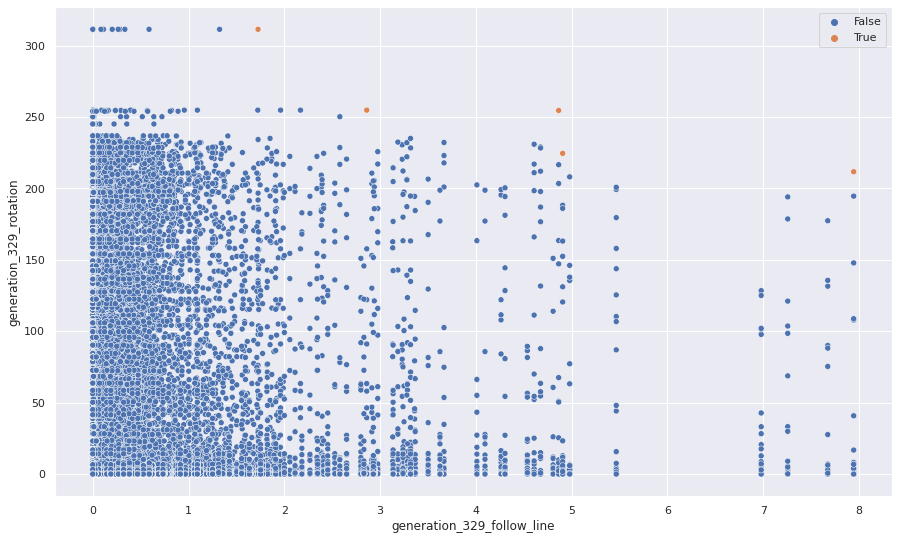

In [48]:
sns.scatterplot(data=merged_short, x='generation_329_follow_line', y='generation_329_rotation', hue=mask)

In [49]:
frame_follow_line_melted = frames[0].melt(id_vars='run')
frame_rotation_melted = frames[1].melt(id_vars='run')

In [50]:
frame_rotation_melted

,run,variable,value
0,1.0,generation_0,2.965930e-35
1,1.0,generation_0,4.477836e+00
2,1.0,generation_0,6.294240e-02
3,1.0,generation_0,2.448409e-01
4,1.0,generation_0,2.978551e-01
...,...,...,...
1108885,30.0,generation_332,3.706243e-35
1108886,30.0,generation_332,3.130291e+00
1108887,30.0,generation_332,4.848614e-03
1108888,30.0,generation_332,1.250662e+02


In [51]:
frame_follow_line_melted.rename(columns={'value':'follow_line'}, inplace=True)

In [52]:
frame_rotation_melted.rename(columns={'value':'rotation'}, inplace=True)

In [53]:
merged_scatter_long = pd.concat([frame_follow_line_melted, frame_rotation_melted], axis=1)

In [54]:
merged_short

,generation_329_follow_line,generation_329_rotation
0,0.006007,3.630595e+00
1,0.006007,1.733463e+00
2,0.006007,6.822559e+01
3,0.006007,6.454199e+01
4,0.006007,4.991061e-35
...,...,...
99895,0.000000,3.324927e-01
99896,0.000000,2.144407e+02
99897,0.000000,0.000000e+00
99898,0.000000,1.424770e+02


In [55]:
merged_scatter_long_cleaned = merged_scatter_long[['follow_line','rotation']]

In [56]:
merged_short

,generation_329_follow_line,generation_329_rotation
0,0.006007,3.630595e+00
1,0.006007,1.733463e+00
2,0.006007,6.822559e+01
3,0.006007,6.454199e+01
4,0.006007,4.991061e-35
...,...,...
99895,0.000000,3.324927e-01
99896,0.000000,2.144407e+02
99897,0.000000,0.000000e+00
99898,0.000000,1.424770e+02


In [57]:
merged_scatter_long_cleaned

,follow_line,rotation
0,0.000000,2.965930e-35
1,0.007043,4.477836e+00
2,0.000055,6.294240e-02
3,0.000000,2.448409e-01
4,0.000000,2.978551e-01
...,...,...
1108885,0.000000,3.706243e-35
1108886,0.044099,3.130291e+00
1108887,0.000000,4.848614e-03
1108888,0.429572,1.250662e+02


In [66]:
mask = paretoset(merged_scatter_long_cleaned, sense=["max", "max"])
mask.shape

(1108890,)

In [70]:
merged_scatter_long.iloc[239844]

run                      1.0
variable       generation_72
follow_line         2.098992
run                      1.0
variable       generation_72
rotation          114.404571
Name: 239844, dtype: object

In [71]:
merged_scatter_long.iloc[311421]

run                     16.0
variable       generation_93
follow_line         7.976406
run                     16.0
variable       generation_93
rotation           19.875457
Name: 311421, dtype: object

In [73]:
merged_scatter_long.iloc[888997]

run                      29.0
variable       generation_266
follow_line          2.047892
run                      29.0
variable       generation_266
rotation           153.204304
Name: 888997, dtype: object

In [ ]:
merged_scatter_long.iloc[239844]

In [ ]:
merged_scatter_long.iloc[239844]

In [59]:
paretoset_df = merged_scatter_long_cleaned[mask]
paretoset_df

,follow_line,rotation
239844,2.098992,114.404571
311421,7.976406,19.875457
386061,5.276690,21.018096
399046,4.300006,42.411392
417934,8.202085,4.210085
433719,1.588735,227.463450
478780,0.646341,260.338281
522267,1.378520,250.012674
565948,2.099606,63.291824
623120,0.416953,324.068289


In [60]:
len(paretoset_df)

20

In [61]:
frame_rotation_melted.iloc[623120]

run                    4.0
variable    generation_187
rotation        324.068289
Name: 623120, dtype: object

In [62]:
frame_rotation_melted.iloc[249494]

run                  28.0
variable    generation_74
rotation         0.424174
Name: 249494, dtype: object

<AxesSubplot:xlabel='follow_line', ylabel='rotation'>

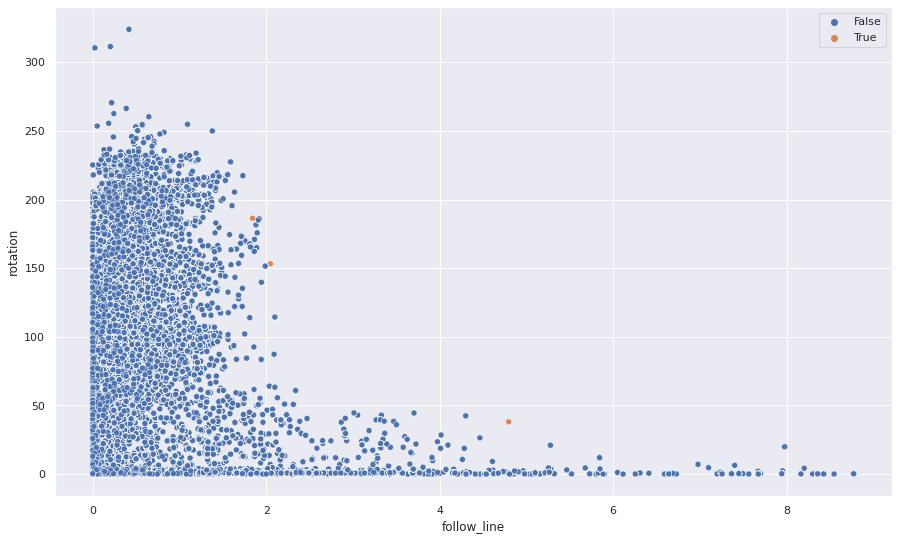

In [63]:
sns.scatterplot(data=merged_scatter_long_cleaned, x='follow_line', y='rotation', hue=mask)

<AxesSubplot:xlabel='follow_line', ylabel='rotation'>

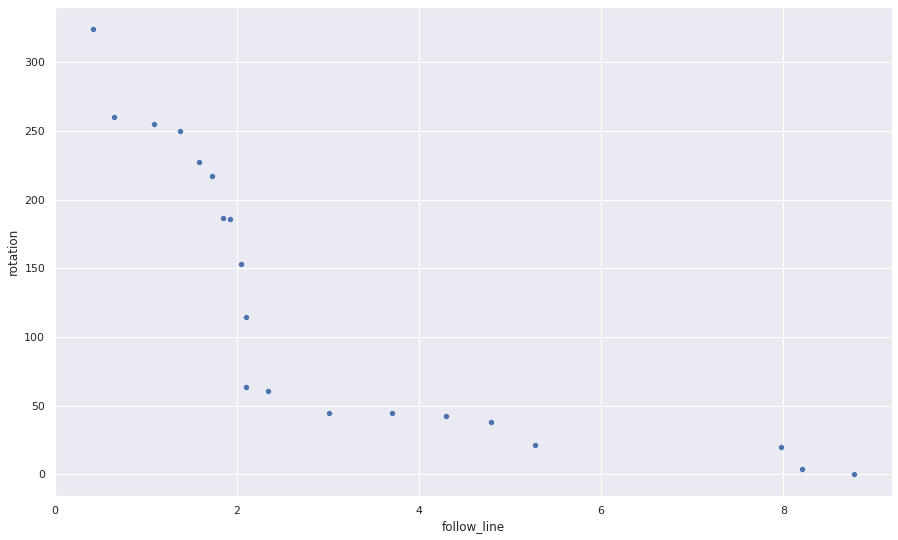

In [64]:
sns.scatterplot(data=paretoset_df, x='follow_line', y='rotation')

In [65]:
paretoset_df.to_csv('pareto_set_dataframe')